# Live Code 3
## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective
- Membuat model `clustering` untuk merekomendasikan negara-negara yang memiliki biaya hidup yang rendah


## Problem Statements
- Meload dataset 
- Mengidentifikasi distribusi kolom-kolom pada dataset
- Mengidentifikasi fitur/kolom yang kiranya berkaitan satu dengan lainnya
- Menghandle missing value dan outlier
- Mereduksi fitur atau kolom yang tidak terlalu diperlukan
- Mendefinisikan teknik clustering dan menetapkan jumlah target cluster
- Mengevaluasi model dengan melihat kecocokan cluster yang terbentuk dan pertimbangan metrik kuantitatif lainnya
- Menyimpan model

## Dataset Desciription
Dataset Name : `living-index-and-internet-prices.csv`

| Column | Description |
| --- | --- |
| Country | Nama negara |
| Country code | Inisial negara |
| Continental Region | Region negara |
| Cost of Living Index | Indikator terhadap harga barang konsumsi, termasuk bahan makanan, restoran, transportasi dan utilitas. Indikator ini tidak termasuk biaya tempat tinggal |
| Rent Index | Indikator terhadap biaya tempat tinggal |
| Groceries Index | Indikator terhadap harga bahan makanan |
| Restaurant Price Index | Indikator terhadap harga makanan dan minuman di restoran dan bar |
| Local Purchasing Power Index | Indikator yang menunjukkan daya beli masyarakat di negara tersebut dalam membeli barang dan jasa terhadap rata-rata gaji bersih yang diterima |
| Number of Internet Plans | Total jumlah provider Internet yang tersedia di suatu negara |
| Average Price per 1GB (USD) | Rata-rata harga Internet per 1 GB per bulan |
| Cheapest Price per 1GB (USD) | Harga Internet termurah per 1 GB per bulan |
| Most Expensive Price per 1GB (USD) | Harga Internet termahal per 1 GB per bulan |
| Internet Users | Jumlah penduduk yang menggunakan Internet |
| Population | Total populasi |

## Import Library

In [282]:
# import library yang dibutuhkan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt

## Data Loading

In [283]:
# set max display column
pd.set_option('display.max_columns', 100)

In [284]:
df = pd.read_csv('living-index-and-internet-prices.csv',index_col=[0]) # read csv

In [285]:
df.head() # menampilkan 5 data teratas

,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,"4,068,194","37,171,921"
1,Albania,AL,EASTERN EUROPE,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,"2,105,339","2,882,740"
2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,"26,350,000","42,228,408"
3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,"33,561,876","44,361,150"
4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,"2,043,110","2,951,745"


In [286]:
df.tail(5) # menampilkan 5 data terbawah

,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
132,Uruguay,UY,SOUTH AMERICA,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,"2,360,269","3,449,285"
133,Uzbekistan,UZ,CIS (FORMER USSR),27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,"16,692,456","32,476,244"
134,Vietnam,VN,ASIA (EX. NEAR EAST),37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,"68,172,134","95,545,962"
135,Yemen,YE,NEAR EAST,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,"7,548,512","28,498,683"
136,Zambia,ZM,SUB-SAHARAN AFRICA,33.04,9.26,31.53,22.46,40.33,60.0,1.13,0.01,6.80,"4,760,715","17,351,708"


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             137 non-null    object 
 1   Country code                        137 non-null    object 
 2   Continental Region                  137 non-null    object 
 3   Cost of Living Index                137 non-null    float64
 4   Rent Index                          137 non-null    float64
 5   Groceries Index                     137 non-null    float64
 6   Restaurant Price Index              137 non-null    float64
 7   Local Purchasing Power Index        137 non-null    float64
 8   Number of Internet Plans            137 non-null    float64
 9   Average Price per 1GB (USD)         137 non-null    float64
 10  Cheapest Price per 1GB (USD)        137 non-null    float64
 11  Most Expensive Price per 1GB (USD)  137 non-n

Data sebanyak 137 entri, memiliki 14 kolom dan ditemukan adanya standard missing values pada kolom `internet users` dan `population`.

In [288]:
# menampilkan standar missing value pada masing masing kolom
df.isnull().sum()

Country                               0
Country code                          0
Continental Region                    0
Cost of Living Index                  0
Rent Index                            0
Groceries Index                       0
Restaurant Price Index                0
Local Purchasing Power Index          0
Number of Internet Plans              0
Average Price per 1GB (USD)           0
Cheapest Price per 1GB (USD)          0
Most Expensive Price per 1GB (USD)    0
Internet Users                        3
Population                            5
dtype: int64

In [289]:
# show missing value in percentage
mv = df['Internet Users'].isna().sum()/df.Country.count()
print(f"Total missing value Internet Users: {mv:.2%}")

Total missing value Internet Users: 2.19%


In [290]:
# show missing value in percentage
mv = df['Population'].isna().sum()/df.Country.count()
print(f"Total missing value Population: {mv:.2%}")

Total missing value Population: 3.65%


Missing value pada kedua kolom relatif kecil, maka entri tersebut dapat di drop.

In [291]:
# drop missing value
df.dropna(inplace=True)

In [292]:
# drop kolom yang tidak diperlukan
df.drop(columns=['Country code','Continental Region','Internet Users','Population',\
    'Number of Internet Plans','Average Price per 1GB (USD)','Most Expensive Price per 1GB (USD)'],inplace=True)

In [293]:
# cek data yang memiliki duplikat
n_data_duplicate = df.duplicated().sum()
print(f"Jumlah data duplikat sebanyak {n_data_duplicate} entri")

Jumlah data duplikat sebanyak 1 entri


In [294]:
# drop data duplikat
df.drop_duplicates(inplace=True)

In [295]:
# menampilkan dataframe yang akan dipakai
df

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
0,Afghanistan,20.37,2.72,14.92,12.41,23.04,0.38
1,Albania,35.50,8.47,29.32,25.82,30.19,0.72
2,Algeria,26.87,4.59,28.82,14.48,24.63,0.16
3,Argentina,34.69,7.71,28.17,33.32,30.72,0.44
4,Armenia,33.89,11.61,27.59,30.55,28.86,0.22
...,...,...,...,...,...,...,...
132,Uruguay,52.07,13.93,44.01,49.39,30.07,0.10
133,Uzbekistan,27.31,9.29,26.83,24.22,22.37,0.01
134,Vietnam,37.48,13.22,38.70,19.98,29.38,0.07
135,Yemen,53.14,6.71,67.12,24.74,14.41,0.40


# Exploratory Data Analysis (EDA)

In [296]:
# menampilkan 5 data teratas
df.head()

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
0,Afghanistan,20.37,2.72,14.92,12.41,23.04,0.38
1,Albania,35.50,8.47,29.32,25.82,30.19,0.72
2,Algeria,26.87,4.59,28.82,14.48,24.63,0.16
3,Argentina,34.69,7.71,28.17,33.32,30.72,0.44
4,Armenia,33.89,11.61,27.59,30.55,28.86,0.22


In [297]:
# menampilkan jumlah negara unique
df.Country.nunique()

131

Terdapat 131 Negara pada dataset

In [298]:
# menampilkan negara dengan cost living index/harga barang konsumsi terendah
df[df['Cost of Living Index']==df['Cost of Living Index'].min()]

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
92,Pakistan,19.92,3.91,17.81,15.54,26.63,0.06


Pakistan adalah negara dengan harga barang konsumsi terendah

In [299]:
# menampilkan negara dengan rent index/biaya tempat tinggal terendah
df[df['Rent Index']==df['Rent Index'].min()]

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
0,Afghanistan,20.37,2.72,14.92,12.41,23.04,0.38


Afghanistan adalah negara dengan biaya tempat tinggal terendah

In [300]:
# menampilkan negara dengan rent index/biaya tempat tinggal terendah
df[df['Cheapest Price per 1GB (USD)']==df['Cheapest Price per 1GB (USD)'].min()]

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
32,Denmark,84.12,33.23,68.60,98.75,99.45,0.0
70,Libya,48.35,12.89,54.03,34.10,33.25,0.0
83,Myanmar,35.67,21.18,37.63,20.00,13.84,0.0
116,Sri Lanka,31.29,8.23,37.67,17.27,19.27,0.0


Denmar, Libya, Myanmar, dan Sri Lanka adalah negara dengan harga internet per 1GB yang termurah yaitu 0.0 atau gratis.

In [301]:
df[df['Local Purchasing Power Index']==df['Local Purchasing Power Index'].min()]

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
29,Cuba,55.0,15.23,47.93,33.54,1.45,3.2


Cuba adalah negara dengan daya beli masyarakat yang terendah, yang artinya gaji masyarakat disana belum tentu cukup untuk memenuhi kebutuhan barang dan jasa masyarakat tersebut.

In [302]:
df[df['Groceries Index']==df['Groceries Index'].min()]

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
0,Afghanistan,20.37,2.72,14.92,12.41,23.04,0.38


Afghanistan adalah negara dengan biaya harga makanan terendah

In [303]:
df[df['Restaurant Price Index']==df['Restaurant Price Index'].min()]

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
0,Afghanistan,20.37,2.72,14.92,12.41,23.04,0.38


Lagi lagi Afghanistan adalah negara dengan dengan harga makanan dan minuman restoran terendah

In [304]:
all_columms = df.columns.to_list()
all_columms

['Country',
 'Cost of Living Index',
 'Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index',
 'Cheapest Price per 1GB (USD)']

In [305]:
# construct titles for plotting
scaled_num_col = all_columms[1:]
titles = []
for i in range(len(scaled_num_col)):
    titles.append('Distribusi ' + scaled_num_col[i])

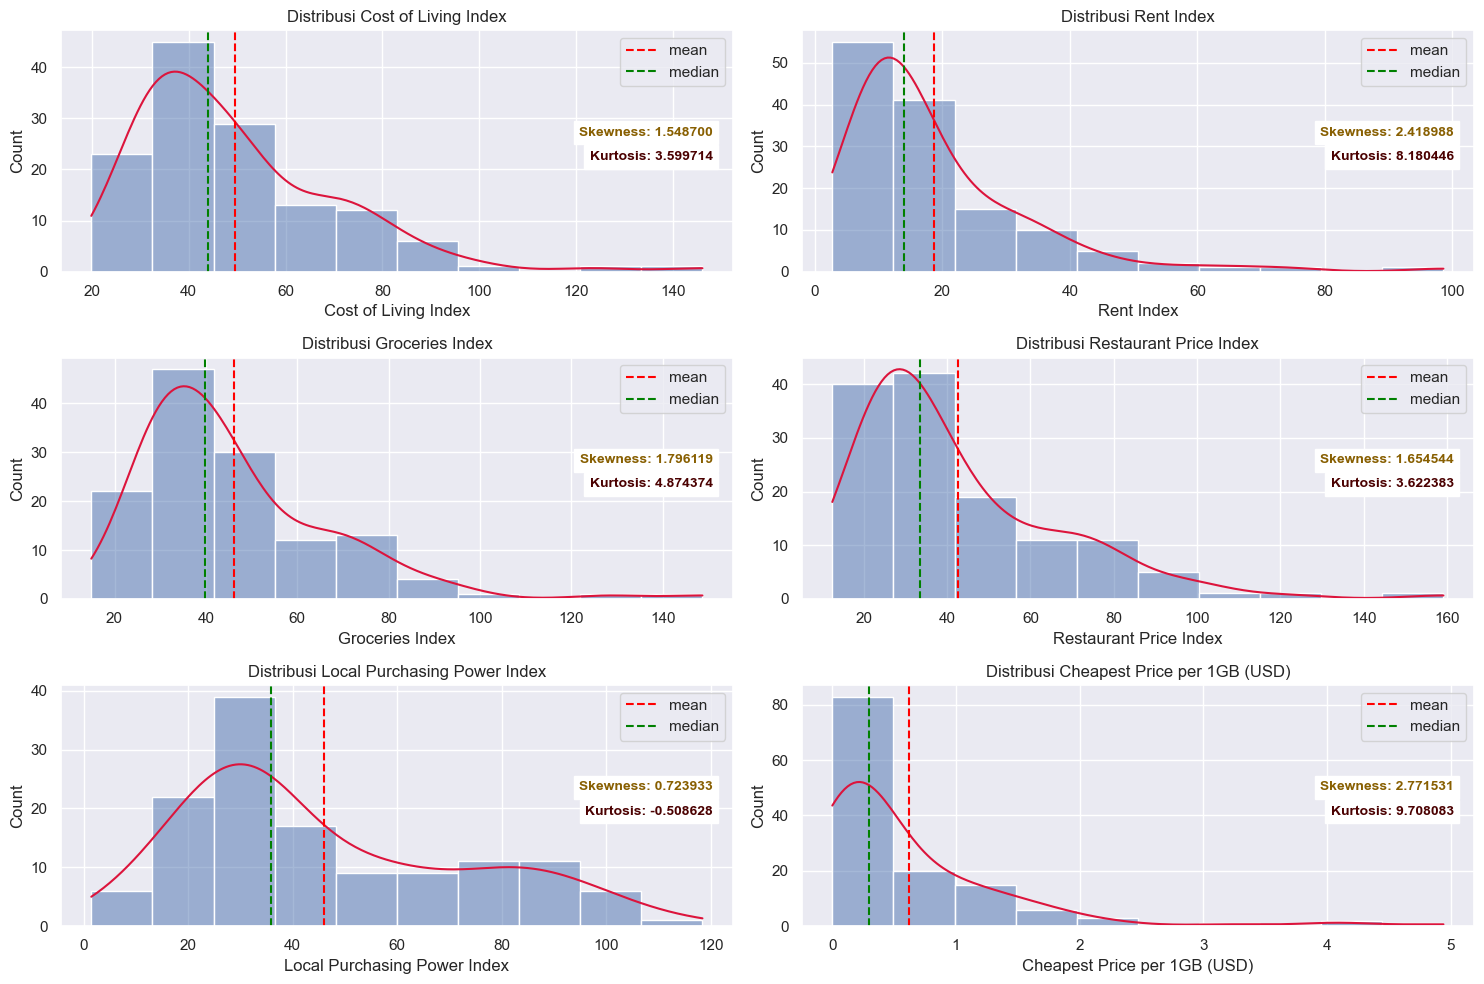

In [306]:
# plot distribusi kolom numerik
row_num=3
col_num=2
fig, axes= plt.subplots(row_num,col_num, figsize=(15,10))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)
x=0
try:
    for i in range(row_num):
        for j in range(col_num):
            sns.histplot(ax=axes[i][j], data=df[scaled_num_col[x]], kde=True, bins=10)
            axes[i][j].set_title(titles[x])
            axes[i][j].lines[0].set_color('crimson')
            axes[i][j].axvline(df[scaled_num_col[x]].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
            axes[i][j].axvline(df[scaled_num_col[x]].median(), color = 'green', linestyle = 'dashed', label = 'median')
            axes[i][j].legend()
            axes[i][j].text(x=0.97, y=0.60, transform=axes[i][j].transAxes, s="Skewness: %f" % df[scaled_num_col[x]].skew(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:poo brown')
            axes[i][j].text(x=0.97, y=0.50, transform=axes[i][j].transAxes, s="Kurtosis: %f" % df[scaled_num_col[x]].kurt(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:dried blood')
            x+=1
except:
    pass
plt.tight_layout()

Tidak ada fitur yang terdistribusi normal, karena teknik clustering K-means dan PCA mengasumsikan data terdistribusi normal, maka data akan di transform ke bentuk `log transform`.

In [307]:
# copy data frame
data_train = df.copy()

In [308]:
# log transform data train pada kolom numerikal
data_train.iloc[:,1:] = np.log(1+df[scaled_num_col])

In [309]:
data_train

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
0,Afghanistan,3.061988,1.313724,2.767576,2.596001,3.179719,0.322083
1,Albania,3.597312,2.248129,3.411808,3.289148,3.440098,0.542324
2,Algeria,3.327551,1.720979,3.395179,2.739549,3.243764,0.148420
3,Argentina,3.574871,2.164472,3.373141,3.535728,3.456947,0.364643
4,Armenia,3.552200,2.534490,3.353057,3.451574,3.396520,0.198851
...,...,...,...,...,...,...,...
132,Uruguay,3.971612,2.703373,3.806885,3.919793,3.436243,0.095310
133,Uzbekistan,3.343215,2.331173,3.326115,3.227637,3.151453,0.009950
134,Vietnam,3.650139,2.654649,3.681351,3.043570,3.413784,0.067659
135,Yemen,3.991573,2.042518,4.221271,3.248046,2.735017,0.336472


## Outlier Handling
Outlier handling akan dilakukan pada fitur numerikal kontinu dengan melihat distribusi dan outliernya terlebih dahulu. Untuk outlier dibawah 5% akan dilakukan trimming, untuk outlier diatas 5% akan dilakukan censoring/capping.

In [310]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5)
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [311]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

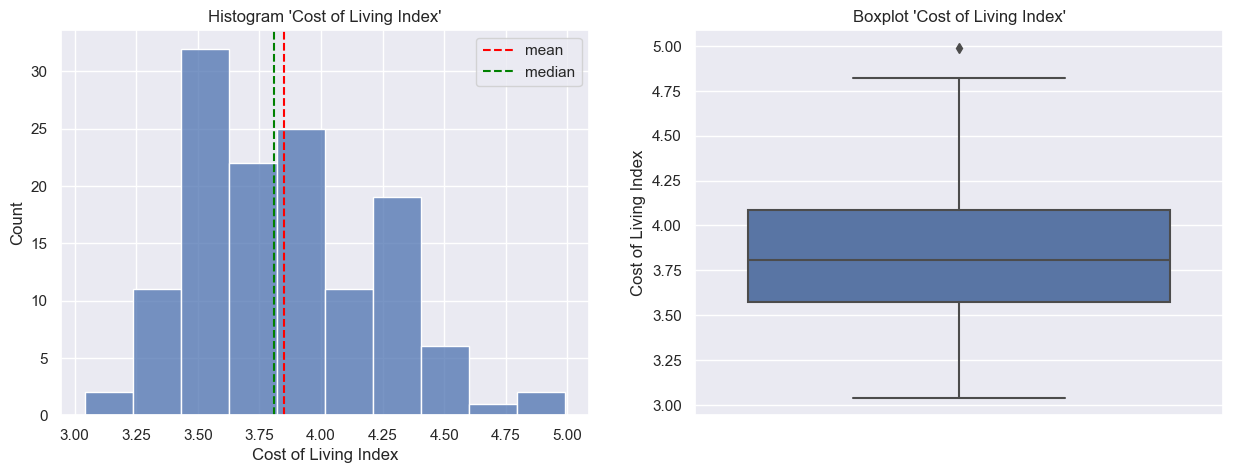

Cost of Living Index Kurtosis: -0.13407457684282464
Cost of Living Index Skewness: 0.45883360584318894
Columns 'Cost of Living Index' is normally distributed


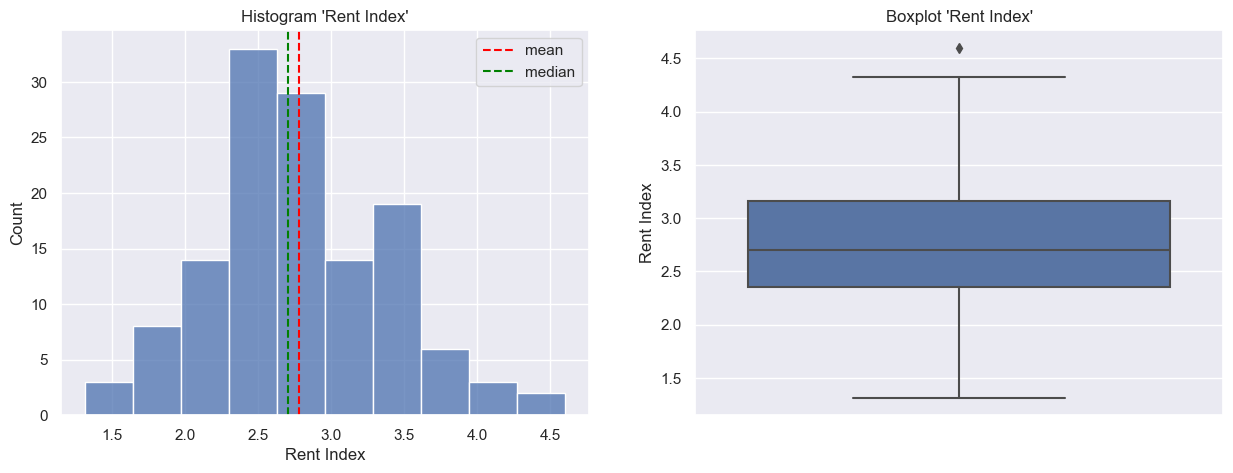

Rent Index Kurtosis: 0.03217776425893559
Rent Index Skewness: 0.38649690070231635
Columns 'Rent Index' is normally distributed


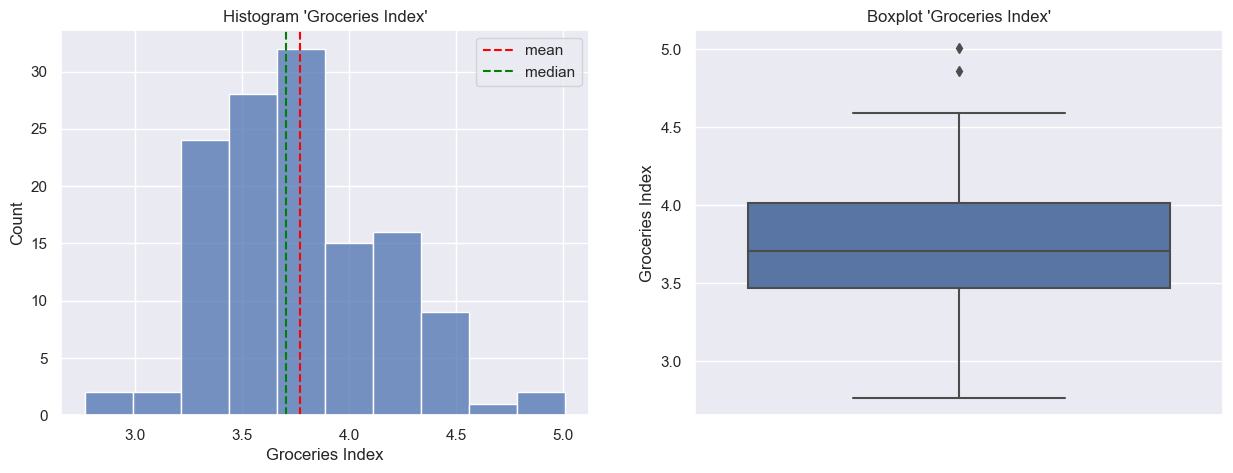

Groceries Index Kurtosis: 0.17327945496475872
Groceries Index Skewness: 0.49503410901651873
Columns 'Groceries Index' is normally distributed


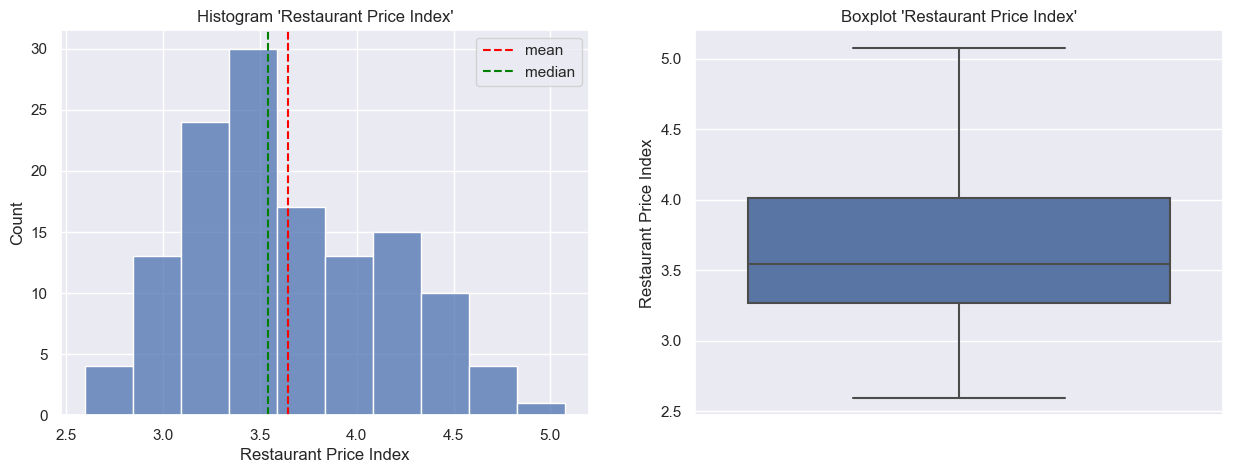

Restaurant Price Index Kurtosis: -0.42268578973660587
Restaurant Price Index Skewness: 0.446039765864437
Columns 'Restaurant Price Index' is normally distributed


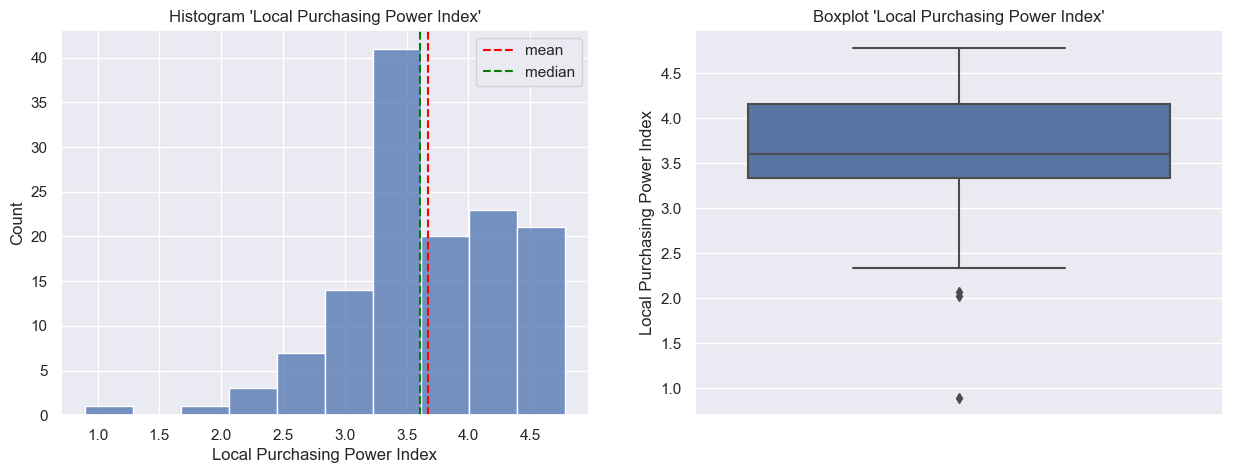

Local Purchasing Power Index Kurtosis: 1.723896955505051
Local Purchasing Power Index Skewness: -0.7653494716202887
Columns 'Local Purchasing Power Index' is moderately left skewed


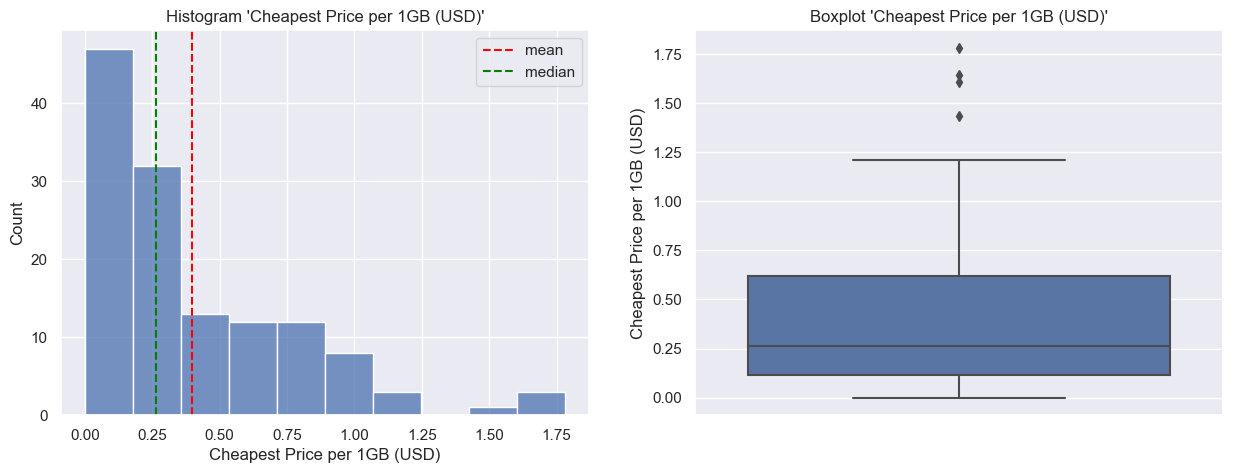

Cheapest Price per 1GB (USD) Kurtosis: 1.7557704311092834
Cheapest Price per 1GB (USD) Skewness: 1.3662255414899376
Columns 'Cheapest Price per 1GB (USD)' is highly right skewed


In [312]:
# plot semua fitur pada data train untuk melihat distribusi sekaligus outliernya
for i in range(len(scaled_num_col)):
    plot_diagnostic(data_train, scaled_num_col[i])

In [313]:
# variable container upper dan lower limit semua kolom numerik
upper = []
lower = []

# simpan value upper dan lower ke dalam list yang sudah dibuat sebelumnya
for i in range(len(scaled_num_col)):
    upper_, lower_ = find_skewed_boundaries(df=data_train, variable=scaled_num_col[i], distance=1.5)
    upper.append(upper_)
    lower.append(lower_)

# simpan value upper dan lower ke dictionary sesuai nama fiturnya dengan format (nama_fitur: upper,lower)
low_up_dict = {}
for i in range(len(scaled_num_col)):
    low_up_dict[scaled_num_col[i]]=[lower[i],upper[i]]

In [314]:
# menampilan dicionary lower dan upper limit value suatu fitur
low_up_dict

{'Cost of Living Index': [2.799848136523969, 4.862458732113063],
 'Rent Index': [1.13607227278002, 4.380619201457043],
 'Groceries Index': [2.6452758359051636, 4.838989957636851],
 'Restaurant Price Index': [2.1514954144630853, 5.123881941971714],
 'Local Purchasing Power Index': [2.0946557544656037, 5.398510494226231],
 'Cheapest Price per 1GB (USD)': [-0.6323886975724422, 1.36804291999574]}

In [315]:
#list containing outliers percentage
trimmed_outliers = []
censored_outliers = []
# menghitung dan menampilkan persentase outlier dari tiap fitur
for i in range(len(scaled_num_col)):
    num_outlier = data_train[scaled_num_col[i]][(data_train[scaled_num_col[i]] > upper[i]) | (data_train[scaled_num_col[i]] < lower[i])].shape[0]
    outlier_percentage = num_outlier/data_train.shape[0]*100
    if (outlier_percentage<5):
        trimmed_outliers.append([scaled_num_col[i],outlier_percentage])
    else:
        censored_outliers.append([scaled_num_col[i],outlier_percentage])

print("Trimmed Outliers Consideration:")
for i in trimmed_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

print("Censored Outliers Consideration:")
for i in censored_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

Trimmed Outliers Consideration:
	Percentage of outlier in Cost of Living Index is 0.76%
	Percentage of outlier in Rent Index is 0.76%
	Percentage of outlier in Groceries Index is 1.53%
	Percentage of outlier in Restaurant Price Index is 0.00%
	Percentage of outlier in Local Purchasing Power Index is 2.29%
	Percentage of outlier in Cheapest Price per 1GB (USD) is 3.05%
Censored Outliers Consideration:


### Trimming

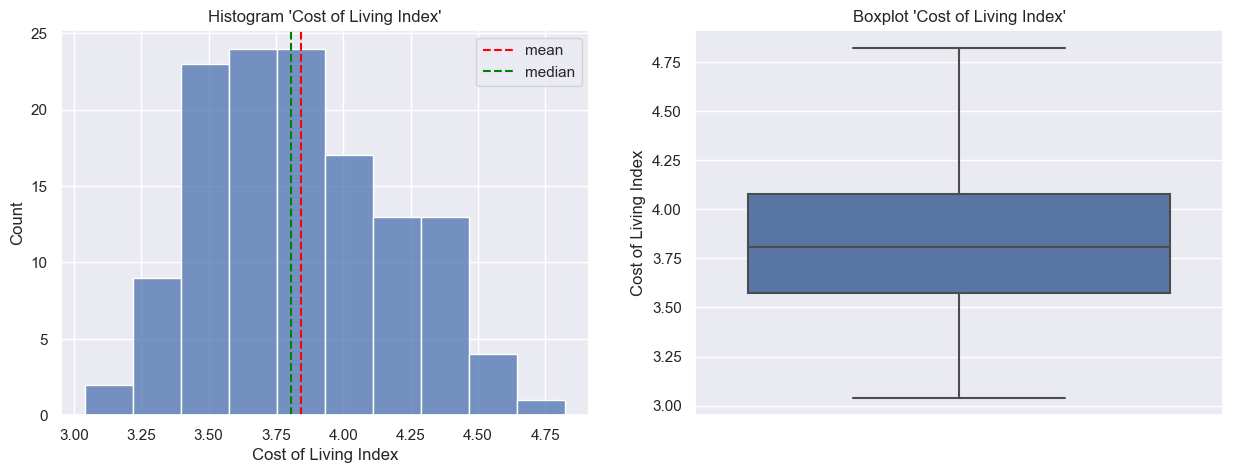

Cost of Living Index Kurtosis: -0.4935624131793781
Cost of Living Index Skewness: 0.3299551356528451
Columns 'Cost of Living Index' is normally distributed


In [316]:
# ambil index outlier fitur Cost of Living Index
index_outlier_living_cost_index = data_train['Cost of Living Index'][(data_train['Cost of Living Index'] < low_up_dict['Cost of Living Index'][0]) | \
    (data_train['Cost of Living Index'] > low_up_dict['Cost of Living Index'][1])].index

# drop outlier 
data_train.drop(index=index_outlier_living_cost_index, inplace=True)

# setelah dilakukan trimming
plot_diagnostic(data_train, 'Cost of Living Index')

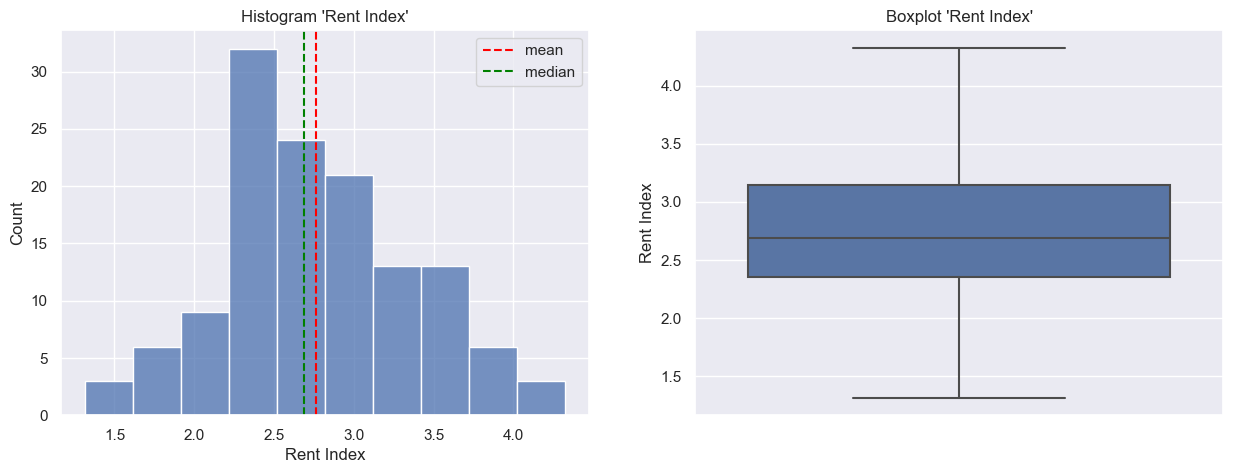

Rent Index Kurtosis: -0.21174257980036604
Rent Index Skewness: 0.27454944730937636
Columns 'Rent Index' is normally distributed


In [317]:
# ambil index outlier fitur Rent Index
index_outlier_rent_index = data_train['Rent Index'][(data_train['Rent Index'] < low_up_dict['Rent Index'][0]) | \
    (data_train['Rent Index'] > low_up_dict['Rent Index'][1])].index

# drop outlier
data_train.drop(index=index_outlier_rent_index, inplace=True)

# setelah dilakukan trimming
plot_diagnostic(data_train, 'Rent Index')

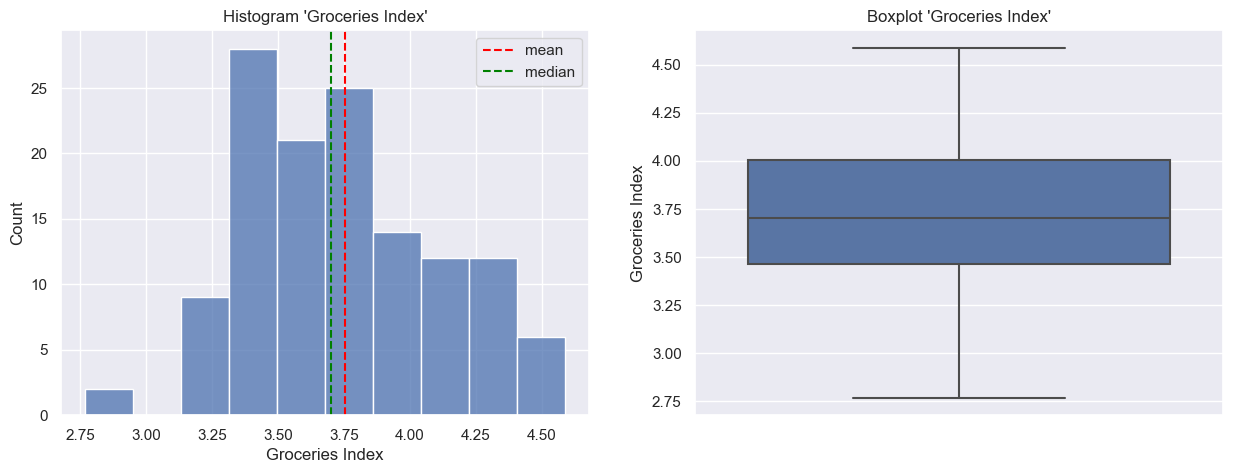

Groceries Index Kurtosis: -0.43490423633114395
Groceries Index Skewness: 0.25038005160596816
Columns 'Groceries Index' is normally distributed


In [318]:
# ambil index outlier fitur Groceries Index
index_outlier_groceries_index = data_train['Groceries Index'][(data_train['Groceries Index'] < low_up_dict['Groceries Index'][0]) | \
    (data_train['Groceries Index'] > low_up_dict['Groceries Index'][1])].index

# drop outlier
data_train.drop(index=index_outlier_groceries_index, inplace=True)

# setelah dilakukan trimming
plot_diagnostic(data_train, 'Groceries Index')

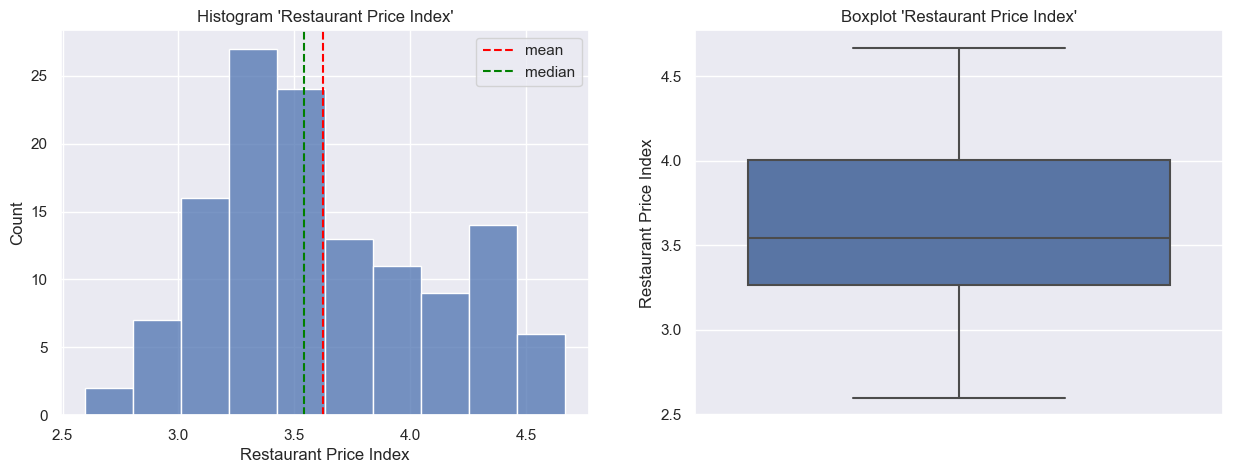

Restaurant Price Index Kurtosis: -0.7302036191534507
Restaurant Price Index Skewness: 0.31857962291401776
Columns 'Restaurant Price Index' is normally distributed


In [319]:
# ambil index outlier fitur Restaurant Price Index
index_outlier_restaurant_price_index = data_train['Restaurant Price Index'][(data_train['Restaurant Price Index'] < low_up_dict['Restaurant Price Index'][0]) | \
    (data_train['Restaurant Price Index'] > low_up_dict['Restaurant Price Index'][1])].index

# drop outlier
data_train.drop(index=index_outlier_restaurant_price_index, inplace=True)

# setelah dilakukan trimming
plot_diagnostic(data_train, 'Restaurant Price Index')

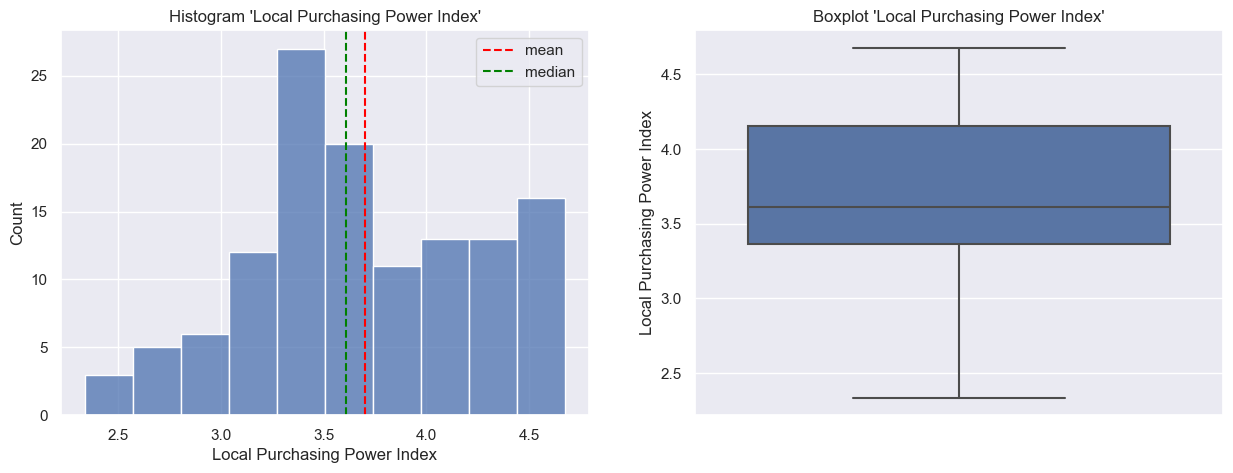

Local Purchasing Power Index Kurtosis: -0.6707644689097867
Local Purchasing Power Index Skewness: -0.09680058859013203
Columns 'Local Purchasing Power Index' is normally distributed


In [320]:
# ambil index outlier fitur Local Purchasing Power Index
index_outlier_local_purchasing_power_index = data_train['Local Purchasing Power Index'][(data_train['Local Purchasing Power Index'] < low_up_dict['Local Purchasing Power Index'][0]) | \
    (data_train['Local Purchasing Power Index'] > low_up_dict['Local Purchasing Power Index'][1])].index

# drop outlier
data_train.drop(index=index_outlier_local_purchasing_power_index, inplace=True)

# setelah dilakukan trimming
plot_diagnostic(data_train, 'Local Purchasing Power Index')

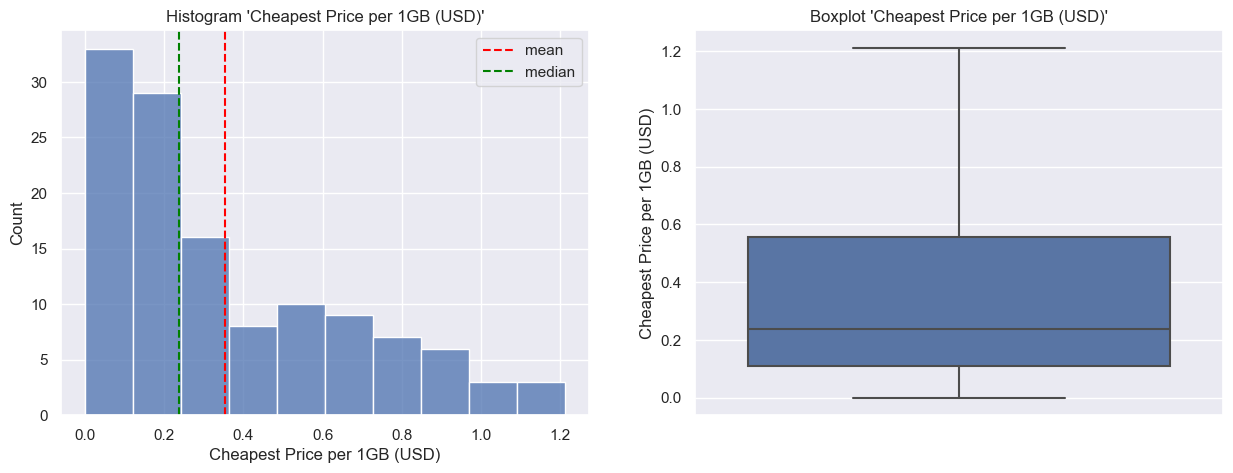

Cheapest Price per 1GB (USD) Kurtosis: -0.16230538510680992
Cheapest Price per 1GB (USD) Skewness: 0.9278525330815305
Columns 'Cheapest Price per 1GB (USD)' is moderately right skewed


In [321]:
# ambil index outlier fitur Cheapest Price per 1GB (USD)
index_outlier_local_cheapest_per_gb = data_train['Cheapest Price per 1GB (USD)'][(data_train['Cheapest Price per 1GB (USD)'] < low_up_dict['Cheapest Price per 1GB (USD)'][0]) | \
    (data_train['Cheapest Price per 1GB (USD)'] > low_up_dict['Cheapest Price per 1GB (USD)'][1])].index

# drop outlier
data_train.drop(index=index_outlier_local_cheapest_per_gb, inplace=True)

# setelah dilakukan trimming
plot_diagnostic(data_train, 'Cheapest Price per 1GB (USD)')

In [322]:
# drop outlier pada original data train
df.drop(index=index_outlier_living_cost_index, inplace=True)
df.drop(index=index_outlier_rent_index, inplace=True)
df.drop(index=index_outlier_groceries_index, inplace=True)
df.drop(index=index_outlier_restaurant_price_index, inplace=True)
df.drop(index=index_outlier_local_purchasing_power_index, inplace=True)
df.drop(index=index_outlier_local_cheapest_per_gb, inplace=True)

## Pipelining
### Encoding & Scaling
- Penulis menggunakan *`Label Encoding`* untuk kolom `Country`
- Dikethui bahwa distribusi fitur-fitur diatas sudah terdistribusi normal, maka penulis akan menggunakan  *`standard scaler`*. 
- Penulis akan membungkus fungsi scaling ini kedalam column transformer dengan variabel bernama *`preprocessor`*

In [323]:
#mendefinisikan kolom/fitur numerik yang akan di transform
list_countries = data_train.Country.unique().tolist()
le_country = LabelEncoder()
std_scaler = StandardScaler()

preprocessed_data_train = pd.DataFrame(columns=data_train.columns)

In [324]:
preprocessed_data_train['Country'] = le_country.fit_transform(data_train.Country)
preprocessed_data_train['Country'] = std_scaler.fit_transform(preprocessed_data_train[['Country']])
preprocessed_data_train.iloc[:,1:] = std_scaler.fit_transform(data_train.iloc[:,1:])
preprocessed_data_train

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD)
0,-1.718139,-2.250246,-2.450294,-2.704667,-2.171332,-0.932201,-0.099280
1,-1.690201,-0.672963,-0.855830,-0.923310,-0.695219,-0.468828,0.616021
2,-1.662264,-1.467790,-1.755355,-0.969289,-1.865635,-0.818226,-0.663306
3,-1.634327,-0.739085,-0.998582,-1.030227,-0.170107,-0.438842,0.038946
4,-1.606390,-0.805881,-0.367185,-1.085761,-0.349321,-0.546380,-0.499516
...,...,...,...,...,...,...,...
119,1.606390,0.429876,-0.079004,0.169113,0.647790,-0.475688,-0.835797
120,1.634327,-1.421637,-0.714125,-1.160259,-0.826211,-0.982503,-1.113030
121,1.662264,-0.517315,-0.162145,-0.177998,-1.218198,-0.515655,-0.925604
122,1.690201,0.488691,-1.206683,1.314927,-0.782749,-1.723598,-0.052548


In [325]:
preprocessed_data_train.drop(columns='Country',inplace=True)

## Multicollinearity Checking
Penulis menggunakan VIF sebagai gambaran fitur-fitur apa yang nantinya bisa di reduksi dengan PCA

In [326]:
# the independent variables set
X = preprocessed_data_train

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

In [327]:
# menampilkan fitur beserta nilai VIF nya terhadap keseluruhan dataset
vif_data.sort_values(by='VIF').reset_index(drop=True)

,feature,VIF
0,Cheapest Price per 1GB (USD),1.140692
1,Local Purchasing Power Index,2.021107
2,Rent Index,3.440062
3,Restaurant Price Index,7.551135
4,Groceries Index,15.661537
5,Cost of Living Index,33.006916


Total terdapat 17 fitur dengan nilai VIF yang bervariasi

In [328]:
vif_data[vif_data.VIF>5].sort_values(by='VIF').reset_index(drop=True)

,feature,VIF
0,Restaurant Price Index,7.551135
1,Groceries Index,15.661537
2,Cost of Living Index,33.006916


- Terdapat 3 dari total 7 fitur yang terlihat memiliki nilai VIF diatas 5, hal ini menandakan adanya *`multicollinearity`* pada 3 fitur tersebut.
- Sebagai gambaran sepertinya 7 fitur pada dataset ini dapat direduksi hingga 5 fitur saja namun hal ini bukanlah suatu kepastian.

## Dimension Reduction with PCA

In [329]:
info_thresh = 0.999
pca = PCA()
pca.fit(preprocessed_data_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= info_thresh) + 1
print(f"{d} fitur setidaknya memuat informasi dataset sebanyak {info_thresh:.3%}")

6 fitur setidaknya memuat informasi dataset sebanyak 99.900%


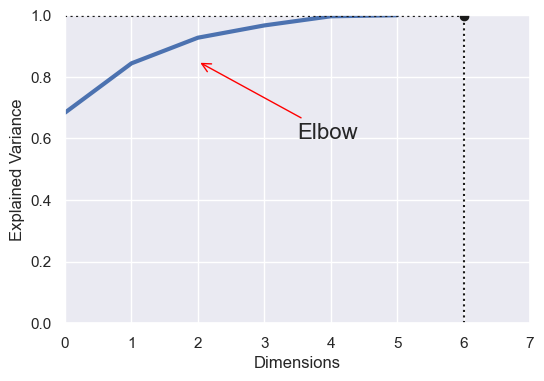

In [330]:
# plot nilai cumulative EVR terhadap dimensi
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 7, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, info_thresh], "k:")
plt.plot([0, d], [info_thresh, info_thresh], "k:")
plt.plot(d, info_thresh, "ko")
plt.annotate("Elbow", xy=(2, 0.85), xytext=(3.5, 0.6),
             arrowprops=dict(arrowstyle="->",color='red'), fontsize=16)
plt.grid(True)
plt.show()

In [331]:
# memakai 80% informasi dataset
pca = PCA(n_components=.999)
X_reduced = pca.fit_transform(preprocessed_data_train)

In [332]:
# melihat jumlah fitur setelah reduksi dimensi
pca.n_components_

6

## Model Training

In [333]:
# instansiasi classifier dengan default parameter
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced)
                for k in range(2, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [334]:
# menampilkan kmeans yang digunakan untuk training
kmeans_per_k

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42)]

In [335]:
# menampilkan nilai inertia
inertias

[376.5761518954635,
 292.42155303232323,
 238.81042791907782,
 206.16168332461905,
 185.01135594674457,
 169.65758536716277,
 150.40633066125145,
 141.35363847045397,
 131.42259000719218]

## Model Evaluation
### Elbow Method
Untuk melihat jumlah cluster atau nilai k yang optimal

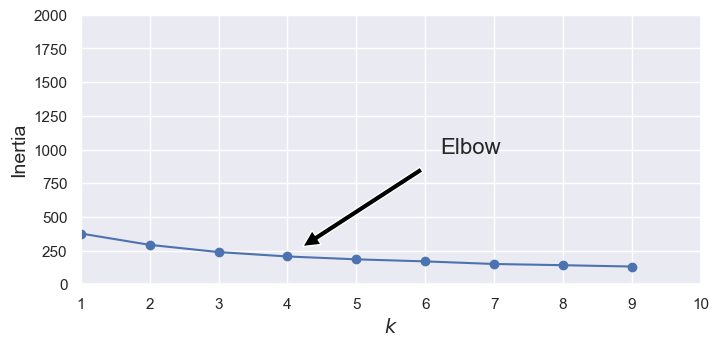

In [336]:
# plot inertia value terhadap k cluster
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10, 0, 2000])
plt.show()

### Silhouette score
Plotting silhouette score

In [337]:
silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

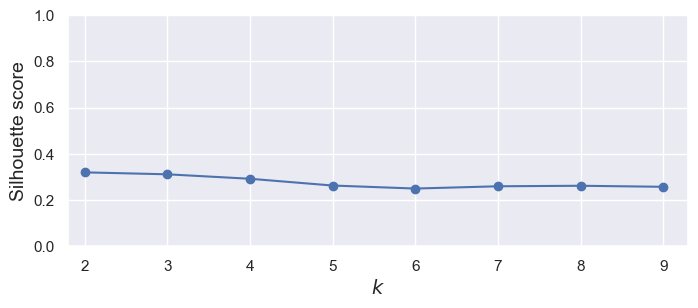

In [338]:
# plot silhouette score terhadap k cluster
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 9.3, 0.0, 1.0])
plt.show()

In [339]:
np.argmax(silhouette_scores)

0

Menurut silhouette score jumlah cluster yang optimal adalah 2

In [340]:
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.4184204466658576
For n_clusters = 3 The average silhouette_score is : 0.31989436621502165
For n_clusters = 4 The average silhouette_score is : 0.3114523516641834
For n_clusters = 5 The average silhouette_score is : 0.2921693742868294
For n_clusters = 6 The average silhouette_score is : 0.27513976750264557
For n_clusters = 7 The average silhouette_score is : 0.2694704652335686


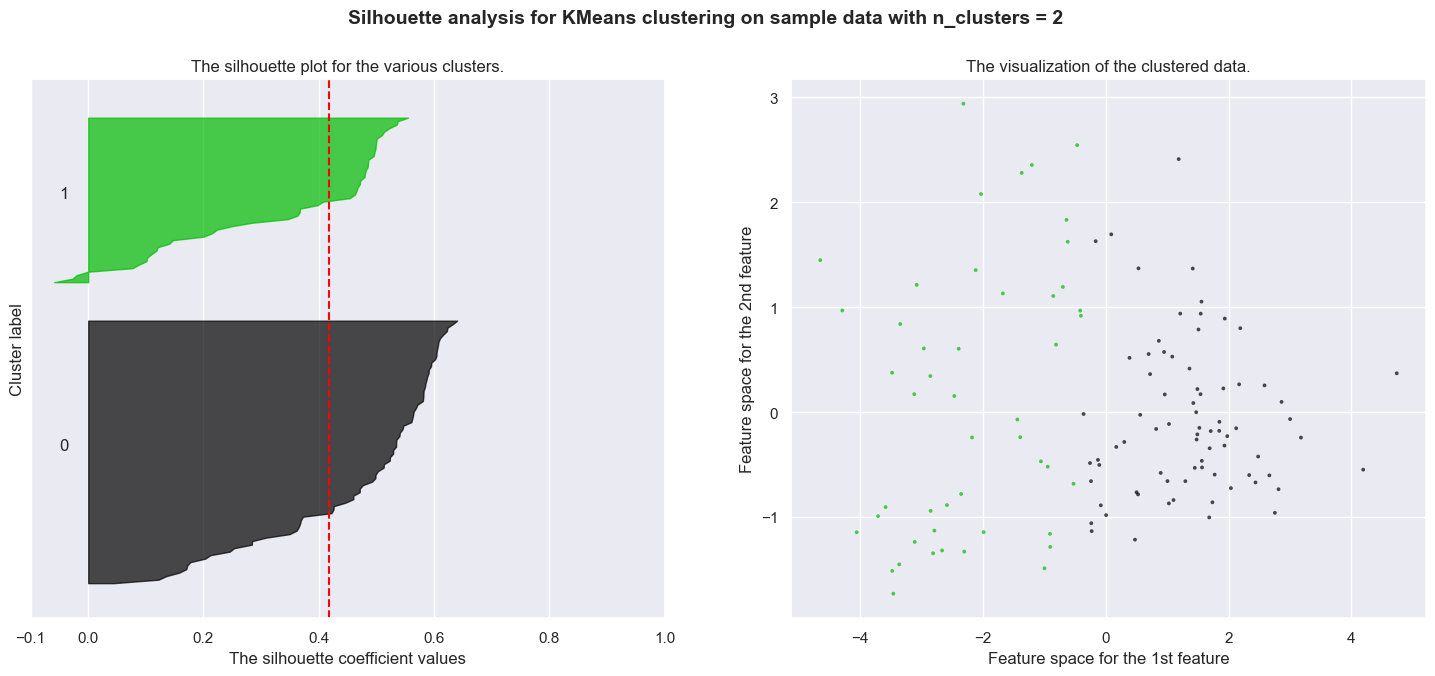

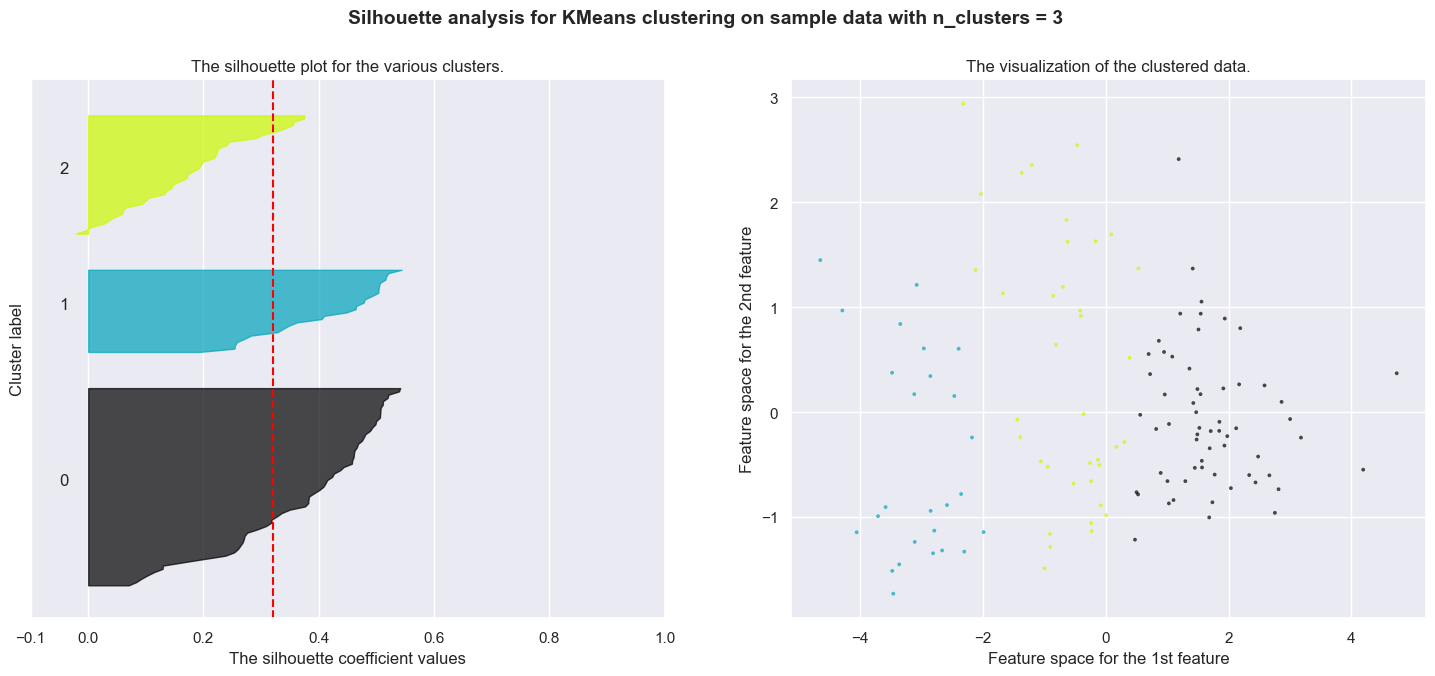

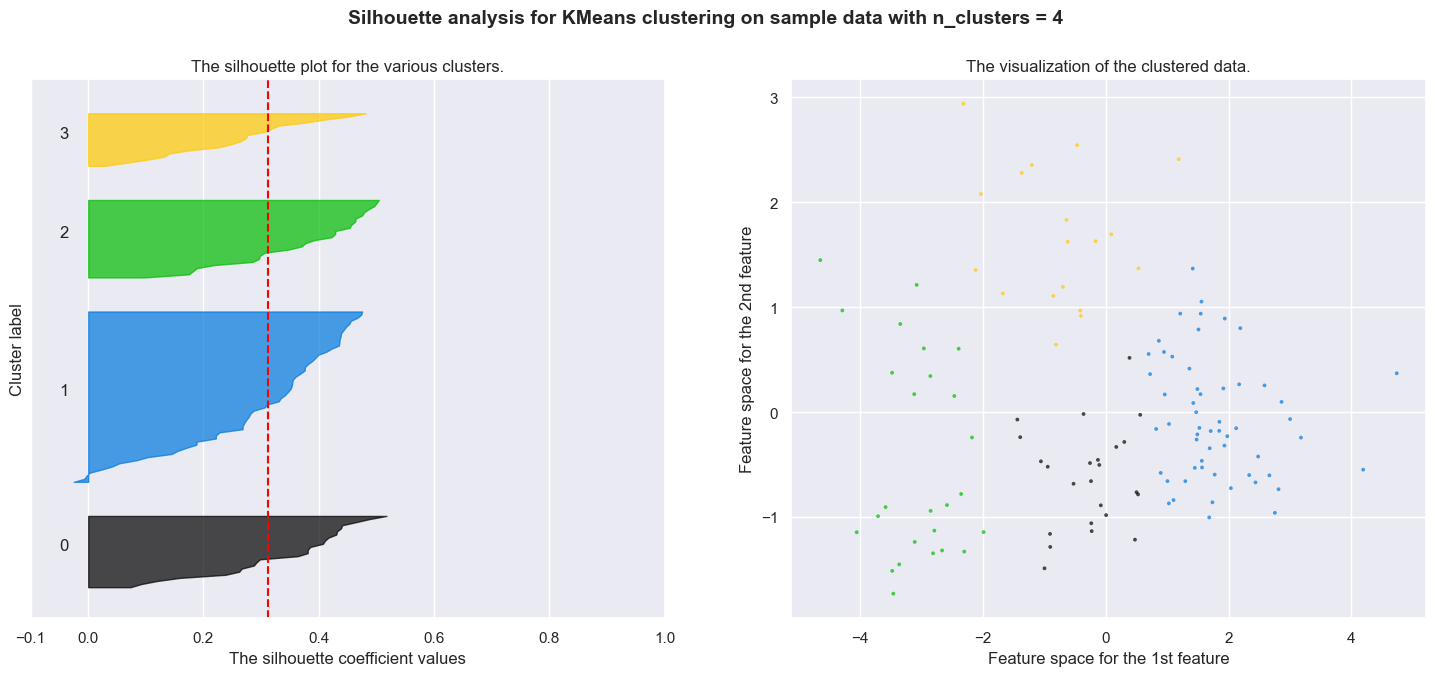

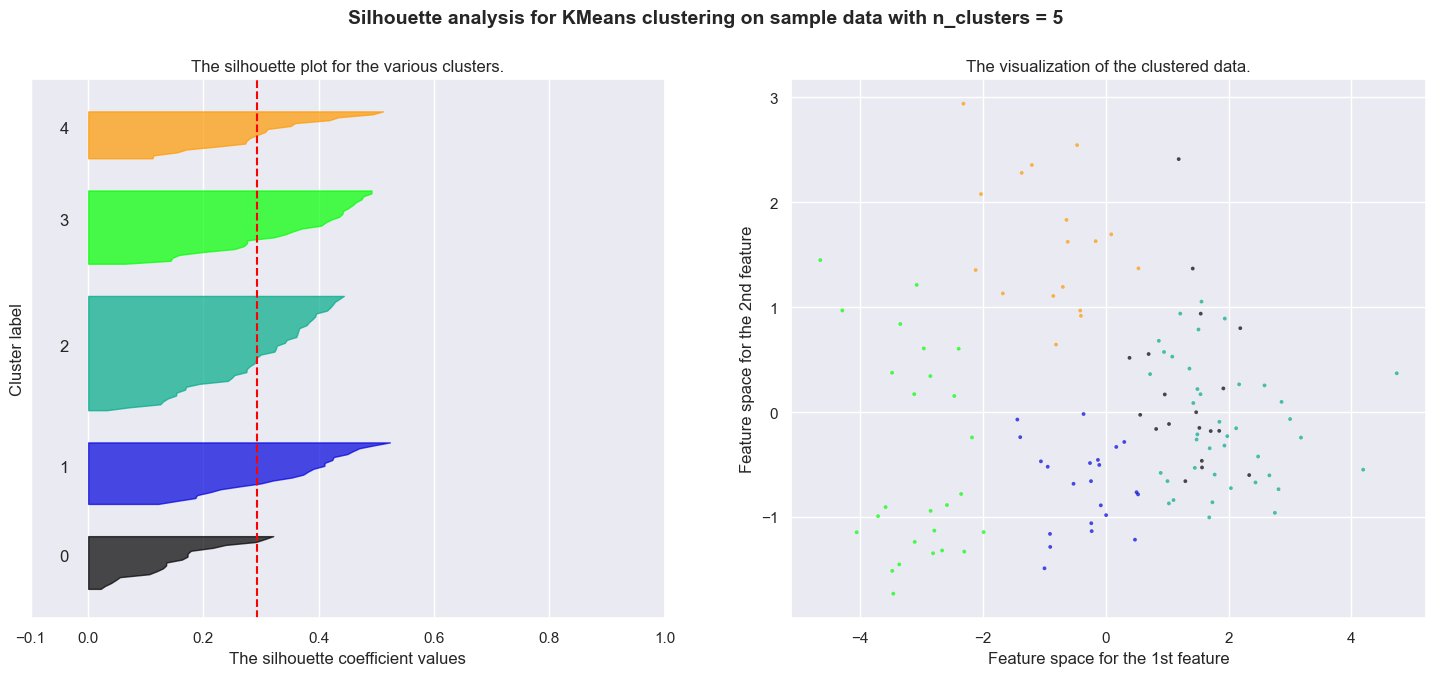

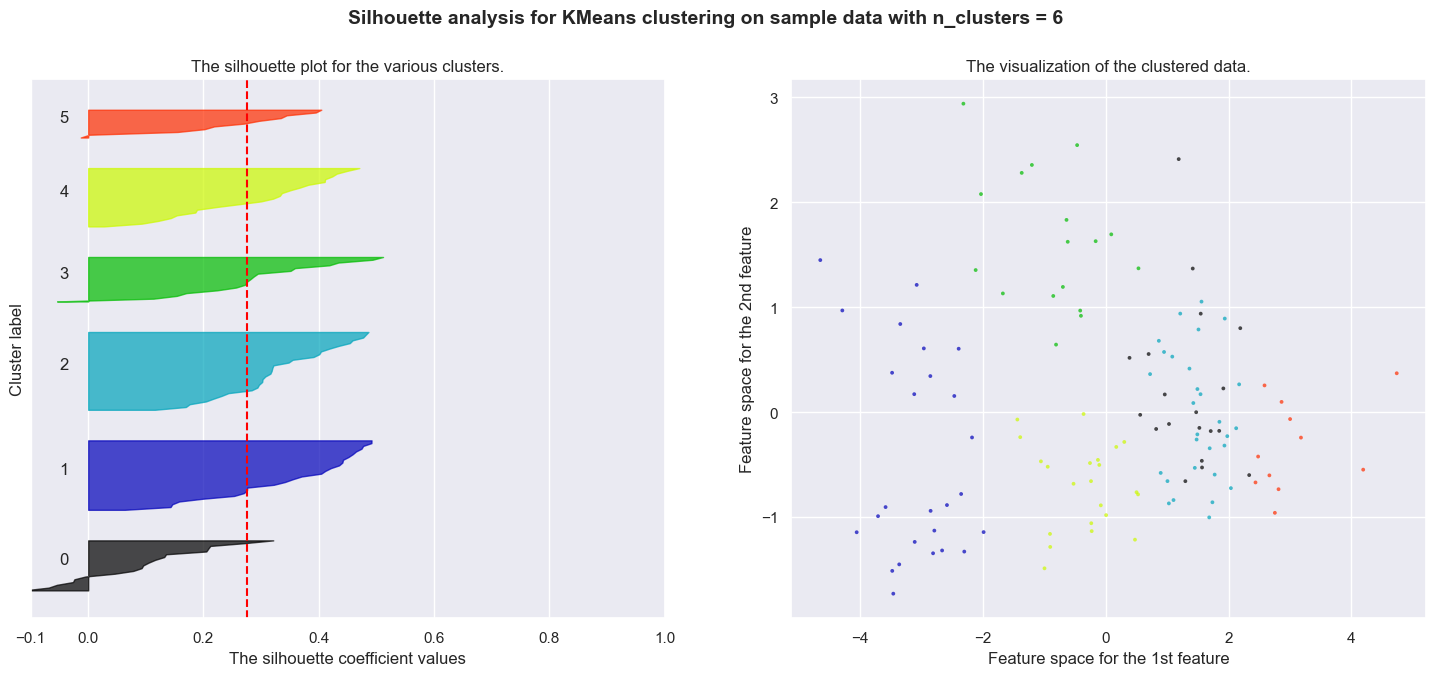

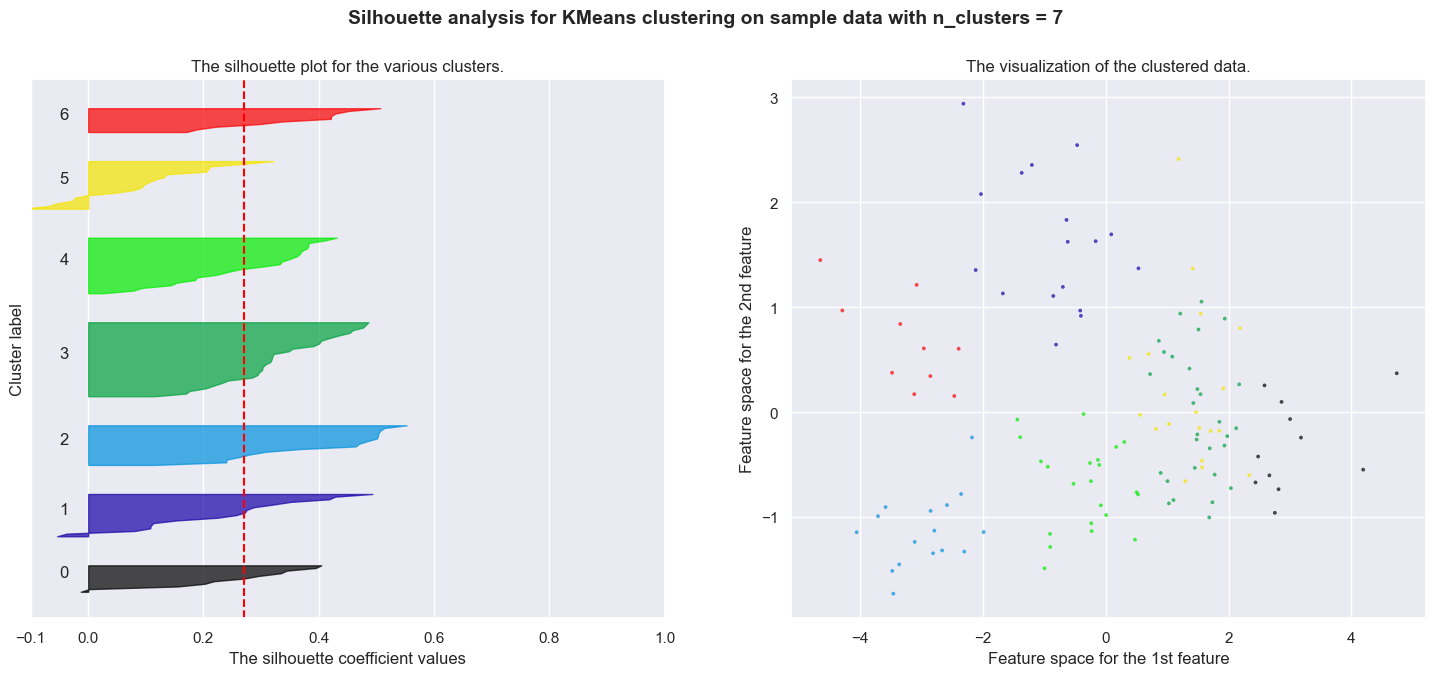

In [341]:
plot_silhouette(KMeans,[2,3,4,5,6,7],X_reduced,'KMeans')

Dari plot silhouette, terlihat 3 cluster tidak ada misklasifikasi yang ditandai dengan tidak adanya ekor pisau kekiri.

### Decision Boundaries
Plotting decision boundaries dengan diagram Voronoi

In [342]:
# plot decision boundary function
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [343]:
# mereduksi dimensi untuk plotting
pca3 = PCA(n_components=3)
X_pca = pca3.fit_transform(preprocessed_data_train)

df_pca3 = pd.DataFrame(X_pca)
df_pca3.columns = ['PC1', 'PC2', 'PC3']
df_pca3.head()

,PC1,PC2,PC3
0,4.739252,0.370751,-1.133917
1,1.510736,0.787744,-0.432499
2,3.179733,-0.242056,-0.101060
3,1.493306,0.220260,-0.427627
4,1.480204,-0.260354,-0.056640


In [344]:
# menampilkan prediksi label cluster kmeans k=3
kmeans_per_k[1].labels_

array([1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1,
       1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1], dtype=int32)

In [345]:
# menyimpan prediksi cluster ke dalam dataframe pca
df_pca3['cluster'] = kmeans_per_k[1].labels_

In [346]:
import plotly.express as px
fig = px.scatter_3d(df_pca3, x=df_pca3['PC1'], y= df_pca3['PC2'], z=df_pca3['PC3'], color=df_pca3['cluster']) 
fig.show()

Plot 3D diatas menunjukkan keterpisahan cluster satu dengan lainnya.

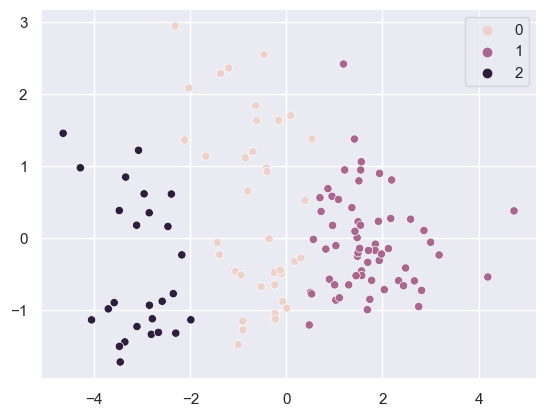

In [347]:
pca2d = PCA(n_components=2)
X_pca2d = pca2d.fit_transform(preprocessed_data_train)
sns.scatterplot(x=X_pca2d[:,0],y=X_pca2d[:,1],hue=kmeans_per_k[1].labels_)
sns.set()

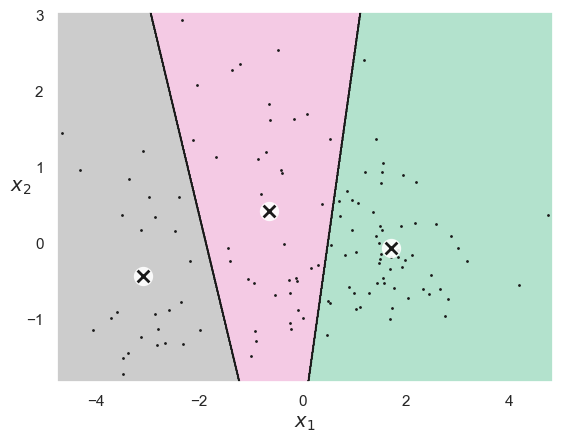

In [348]:
kmeans2 = KMeans(n_clusters=3,random_state=42)
pred2d = kmeans2.fit_predict(X_pca2d)

plot_decision_boundaries(kmeans2,X_pca2d)

## Evaluasi Cluster Terbentuk

In [349]:
# prediksi cluster pada original data train
df['pred_cluster'] = kmeans_per_k[1].predict(X_reduced)

### Cluster 1

In [350]:
# cluster 1
cluster_1 = df[df.pred_cluster==0]
cluster_1.head()

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD),pred_cluster
9,Bahrain,54.77,29.22,44.59,48.94,61.41,1.27,0
14,Belize,51.30,11.64,48.76,36.60,45.73,1.48,0
18,Botswana,40.17,10.21,35.16,42.50,62.63,1.63,0
24,Chile,43.90,13.51,38.87,43.26,33.27,0.24,0
25,China,41.77,16.53,46.01,28.37,59.99,0.30,0


In [352]:
cluster_1.describe()

,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD),pred_cluster
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0
mean,50.261081,17.400541,46.022703,44.288108,47.262703,0.791351,0.0
std,6.955165,6.027617,8.875752,11.355777,19.406153,0.694395,0.0
min,35.350000,9.230000,34.780000,28.370000,13.440000,0.000000,0.0
25%,45.650000,13.190000,40.810000,36.080000,33.090000,0.240000,0.0
50%,49.420000,16.110000,44.590000,42.100000,45.730000,0.500000,0.0
75%,53.880000,20.730000,48.760000,48.940000,59.990000,1.270000,0.0
max,69.620000,32.350000,76.190000,79.610000,91.850000,2.360000,0.0


In [351]:
cluster_1.Country.unique()

array(['Bahrain', 'Belize', 'Botswana', 'Chile', 'China', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'El Salvador', 'Estonia',
       'Fiji', 'Greece', 'Guatemala', 'Jamaica', 'Jordan', 'Kuwait',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Maldives', 'Mexico',
       'Oman', 'Panama', 'Portugal', 'Saudi Arabia', 'Senegal',
       'Seychelles', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Suriname', 'Taiwan', 'Trinidad And Tobago', 'Uruguay'],
      dtype=object)

Cluster 1 memiliki cost of living index rata-rata sebesar 50 rent index sebesar 17, groceries index sebesar 46. Kedua termurah setelah cluster 2

### Cluster 2

In [353]:
# cluster 2
cluster_2=df[df.pred_cluster==1]
cluster_2.head()

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD),pred_cluster
0,Afghanistan,20.37,2.72,14.92,12.41,23.04,0.38,1
1,Albania,35.50,8.47,29.32,25.82,30.19,0.72,1
2,Algeria,26.87,4.59,28.82,14.48,24.63,0.16,1
3,Argentina,34.69,7.71,28.17,33.32,30.72,0.44,1
4,Armenia,33.89,11.61,27.59,30.55,28.86,0.22,1


In [355]:
cluster_2.describe()

,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD),pred_cluster
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,34.359508,10.226066,32.143443,24.895082,29.162131,0.302951,1.0
std,6.065512,4.997780,7.818467,5.372227,10.984403,0.287201,0.0
min,19.920000,2.720000,14.920000,12.410000,9.340000,0.000000,1.0
25%,30.490000,7.860000,27.360000,20.920000,21.540000,0.100000,1.0
50%,34.470000,9.440000,30.710000,24.970000,28.860000,0.220000,1.0
75%,37.340000,11.280000,36.680000,28.550000,34.190000,0.440000,1.0
max,53.140000,35.990000,67.120000,34.560000,59.950000,1.410000,1.0


In [354]:
cluster_2.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Bolivia',
       'Bosnia And Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cameroon', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'Ethiopia', 'Georgia', 'Ghana', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Kazakhstan', 'Kenya', 'Malaysia',
       'Mauritius', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Myanmar', 'Nepal', 'Nicaragua', 'Nigeria', 'North Macedonia',
       'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania',
       'Russia', 'Rwanda', 'Serbia', 'Somalia', 'Sri Lanka', 'Tanzania',
       'Thailand', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'Uzbekistan',
       'Vietnam', 'Yemen', 'Zambia'], dtype=object)

Cluster 2 memiliki cost of living index rata-rata sebesar 34 rent index sebesar 10 dan groceries index sebesar 32. Termurah dari semua cluster

### Cluster 3

In [356]:
# cluster 3
cluster_3=df[df.pred_cluster==2]
cluster_3.head()

,Country,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD),pred_cluster
5,Australia,77.75,36.84,77.44,72.95,104.63,0.10,2
6,Austria,71.04,27.13,65.88,66.03,77.25,0.24,2
13,Belgium,72.61,25.79,63.32,78.63,79.72,1.48,2
23,Canada,70.22,34.33,70.01,67.86,87.98,0.80,2
32,Denmark,84.12,33.23,68.60,98.75,99.45,0.00,2


In [358]:
cluster_3.describe()

,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cheapest Price per 1GB (USD),pred_cluster
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,75.075769,35.776154,70.233462,72.459231,84.918077,0.539615,2.0
std,9.592562,13.938809,12.417032,15.650310,14.167394,0.522222,0.0
min,58.330000,18.400000,46.670000,42.100000,44.180000,0.000000,2.0
25%,69.770000,25.882500,62.405000,61.900000,77.107500,0.115000,2.0
50%,73.210000,33.585000,69.805000,71.210000,86.260000,0.255000,2.0
75%,79.812500,42.035000,76.990000,78.385000,93.295000,0.865000,2.0
max,100.900000,74.570000,97.310000,105.490000,106.340000,1.740000,2.0


In [357]:
cluster_3.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Hong Kong', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Luxembourg', 'Malta', 'New Zealand', 'Norway',
       'Puerto Rico', 'Qatar', 'Singapore', 'South Korea', 'Sweden',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

Cluster 3 memiliki cost of living index rata-rata sebesar 71, dengan rata-rata rent index sebesar 35, groceries index sebesar 70. Cluster 3 adalah negara-negara dengan rata-rata biaya hidup termahal dari semua cluster.

## Problems

Seorang teman Anda merasa di negara yang sedang ia tempati semua harga kebutuhan naik sehingga ia berencana untuk menetap di negara lain dan memulai kehidupannya sebagai seorang imigran. Bantulah teman Anda tersebut untuk merekomendasikan negara-negara yang memiliki biaya hidup yang rendah (tempat tinggal, makanan, internet, dll) dari dataset yang diberikan dibawah ini.

1. Pada bagian eksplorasi data, apa insight menarik yang bisa Anda ceritakan ?
>Afghanistan adalah negara dengan biaya hidup termurah, dari segi barang konsumsi maupun sewa hunian. Juga terdapat beberapa negara dengan biaya internet gratis.

2. Berapa cluster yang berhasil Anda peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.
>Cluster yang terbentuk ada 3, berdasarkan plot silhouette, jumlah tersebut sudah optimal tanpa misklasifikasi. Visualisasi sudah dilakukan.

3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?
>Dari semua cluster, biaya hidup terendah ada pada cluster 2, dari segi biaya kebutuhan konsumsi maupun hunian, kedua termurah adalah cluster 1 dan yang termahal adalah cluster 3. Namun rata-rata local purchasing power dari terkecil ke terbesar juga demikian, yakni cluster 2, 1, lalu 3. Kesimpulannya local purchasing power berbanding lurus dengan biaya hidup di cluster negara tersebut.

4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?
>Semua cluster memiliki rata-rata purchasing power berbeda dan berbanding lurus dengan biaya hidup rata rata di negara tsb, artinya apabila ada teman yang ingin menjadi imigran dan ingin memiliki daya beli yang tinggi, tinggallah di negara cluster 3, namun apabila ingin yang termurah tinggallah di negara cluster 2 tapi bersiaplah untuk mendapat daya beli yang juga rendah. Apabila ingin mengambil tengah-tengah, teman tsb dapat tinggal di negara cluster 1.

5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !
>Afghanistan ternyata termasuk cluster 2 dimana cluster 2 memang negara-negara dengan living cost termurah

## Conclusion
- Afghanistan adalah negar dengan living cost termurah dari semua negara diseluruh dunia
- Urutan biaya hidup cluster negara termahal ke yang termurah adalah cluster 3, cluster 1, dan cluster 2
- Biaya internet di semua negara relatif sama